# 1. Introduction to Gaussian Distribution

The Gaussian distribution, also known as the normal distribution, is one of the most important probability distributions in statistics and machine learning. It's characterized by its bell-shaped curve and is defined by two parameters: the mean (μ) and the variance (σ²).

## 1.1 Univariate Gaussian Distribution

The probability density function (PDF) of a univariate Gaussian distribution is given by:

$f(x | μ, σ²) = \frac{1}{\sqrt{2πσ²}} * exp(-\frac{(x - μ)^2}{2σ²})$

Where:
- x is the variable
- μ is the mean (average value)
- σ² is the variance (spread of the distribution)

Let's visualize this using Python:

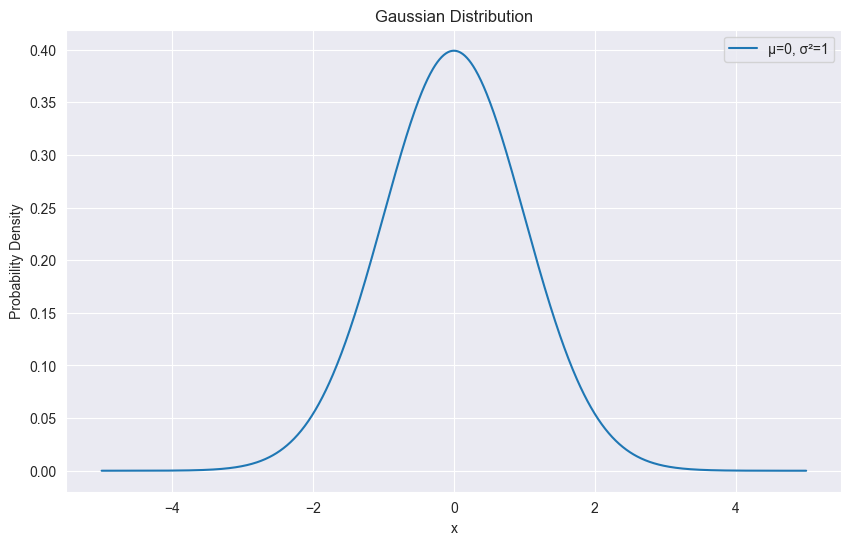

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian(x, 0, 1), label='μ=0, σ²=1')
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Exercise:

1. Plot 3 Gaussian distributions, with a mean of -2, 0, and 2, and variance 1.
2. Plot 3 Gaussian distributions with a mean 0 and variance 0.5, 1, and 2.



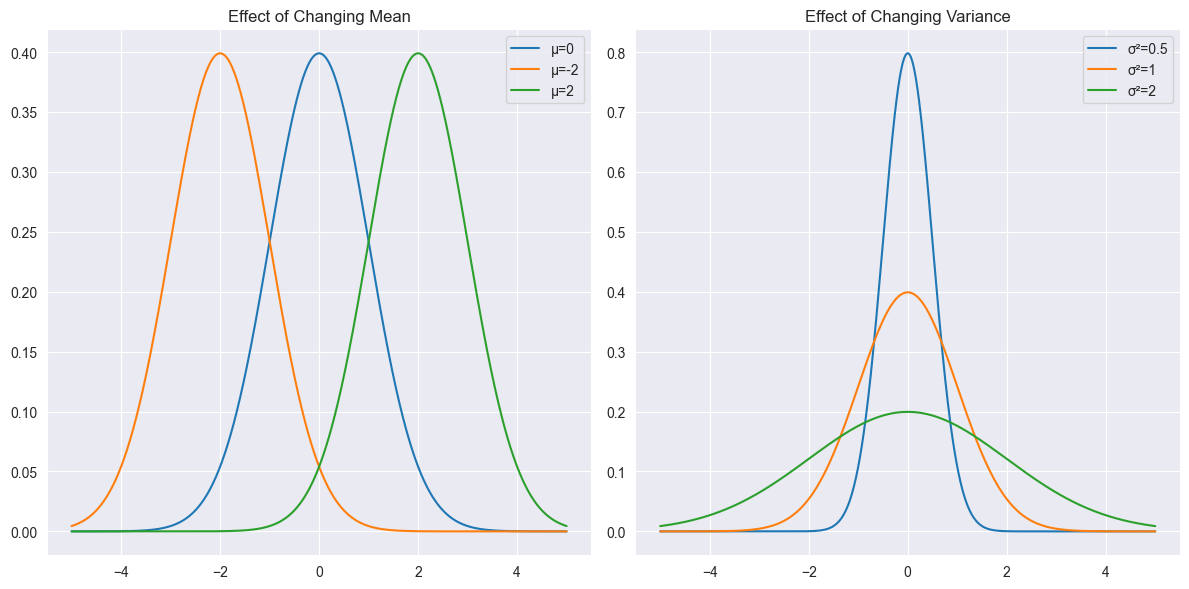

In [ ]:
## Begin Solution
plt.figure(figsize=(12, 6))

# Varying mean
plt.subplot(1, 2, 1)
plt.plot(x, gaussian(x, 0, 1), label='μ=0')
plt.plot(x, gaussian(x, -2, 1), label='μ=-2')
plt.plot(x, gaussian(x, 2, 1), label='μ=2')
plt.title('Effect of Changing Mean')
plt.legend()

# Varying variance
plt.subplot(1, 2, 2)
plt.plot(x, gaussian(x, 0, 0.5), label='σ²=0.5')
plt.plot(x, gaussian(x, 0, 1), label='σ²=1')
plt.plot(x, gaussian(x, 0, 2), label='σ²=2')
plt.title('Effect of Changing Variance')
plt.legend()

plt.tight_layout()
plt.show()
## End Solution

# 2. Multivariate Gaussian Distribution

## 2.1 Extension to Multiple Dimensions

The multivariate Gaussian distribution is an extension of the univariate Gaussian to higher dimensions. For a d-dimensional vector x, it's defined by:

- A mean vector μ (d x 1)
- A covariance matrix Σ (d x d)

The PDF is given by:

$f(x | μ, Σ) = \frac{1}{(2π)^{d/2}\sqrt{|Σ|}}exp(-0.5 * (x - μ)ᵀ * Σ^{-1} * (x - μ))$

Where |Σ| is the determinant of Σ, and Σ⁻¹ is its inverse.

## 2.2 Covariance Matrix

The covariance matrix Σ captures the variance of each variable along its diagonal and the covariance between variables in its off-diagonal elements.

- Diagonal elements: $Σ_{ii} = \text{Var}(X_i)$
- Off-diagonal elements: $Σ_{ij} = \text{Cov}(X_i, X_j)$

A diagonal covariance matrix implies uncorrelated variables, while non-zero off-diagonal elements indicate correlation.

## 2.3 Visualization

Let's visualize a 2D Gaussian distribution:

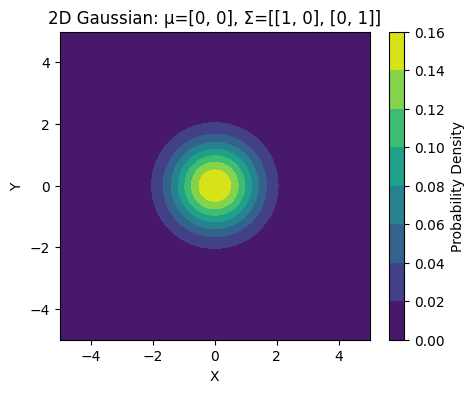

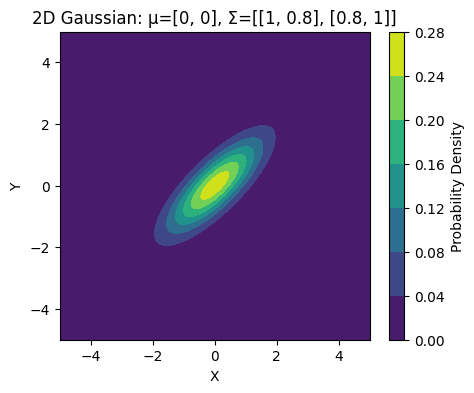

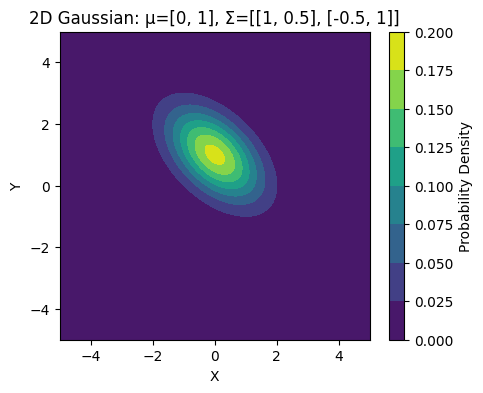

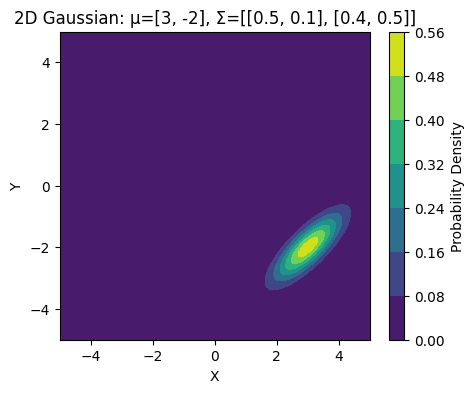

In [ ]:
from scipy.stats import multivariate_normal

def plot_2d_gaussian(mu, cov):
    x, y = np.mgrid[-5:5:.01, -5:5:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mu, cov)

    fig, axesa = plt.subplots(2, 2, figsize=(5, 4))
    plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.title(f'2D Gaussian: μ={mu}, Σ={cov}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Example 1: Uncorrelated variables
mu1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
plot_2d_gaussian(mu1, cov1)

# Example 2: Correlated variables
mu2 = [0, 0]
cov2 = [[1, 0.8], [0.8, 1]]
plot_2d_gaussian(mu2, cov2)

# Example 3: Correlated variables
mu3 = [0, 1]
cov3 = [[1, 0.5], [-0.5, 1]]
plot_2d_gaussian(mu3, cov3)

# Example 4: Correlated variables
mu4 = [3, -2]
cov4 = [[0.5, 0.1], [0.4, 0.5]]
plot_2d_gaussian(mu4, cov4)

# 3. Introduction to Gaussian Mixture Models (GMMs)

Gaussian Mixture Models (GMMs) are a powerful and flexible tool for modeling complex probability distributions. They can be thought of as a combination of multiple Gaussian distributions, allowing us to model multi-modal data or clusters with different shapes and orientations.

A mixture model is a probabilistic model that represents the presence of subpopulations within an overall population. In a GMM, each subpopulation is modeled by a Gaussian distribution.
The probability density function (PDF) of a GMM is a weighted sum of K component Gaussian densities:

$p(x) = Σ_{i=1}^{K}π_iN(x | μ_i, Σ_i)$

Where:

K is the number of components,

πᵢ are the mixture weights $(Σ_{i=1}^K π_i = 1)$,

and $N(x | μ_i, Σ_i)$ is the PDF of the i-th Gaussian component.

A GMM is fully described by three parameters:

Mixture weights (π): The probability of each component
Mean vectors (μ): The center of each Gaussian component
Covariance matrices (Σ): The shape and orientation of each component

[You may want to browse this notebook for a deeper look](https://stephens999.github.io/fiveMinuteStats/intro_to_mixture_models.html)

## 3.1 Implementing a Simple GMM

Let's implement a simple GMM and visualize it:

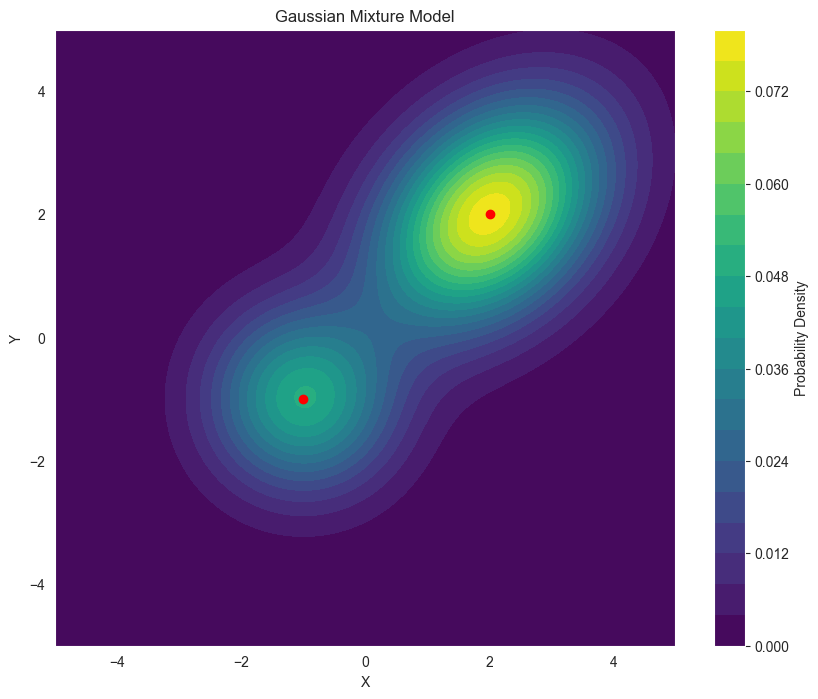

In [ ]:
def gmm_pdf(X, weights, means, covs):
    n_components = len(weights)
    pdf = np.zeros(X.shape[0])
    for i in range(n_components):
        pdf += weights[i] * multivariate_normal.pdf(X, mean=means[i], cov=covs[i])
    return pdf

# Define GMM parameters
weights = [0.3, 0.7]
means = [[-1, -1], [2, 2]]
covs = [[[1, 0], [0, 1]], [[1.5, 0.5], [0.5, 1.5]]]

# Create a mesh grid
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))

# Calculate GMM PDF
gmm_values = gmm_pdf(pos.reshape(-1, 2), weights, means, covs).reshape(x.shape)

# Plot the GMM
plt.figure(figsize=(10, 8))
plt.contourf(x, y, gmm_values, levels=20, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.title('Gaussian Mixture Model')
plt.xlabel('X')
plt.ylabel('Y')

# Plot the component means
for mean in means:
    plt.plot(mean[0], mean[1], 'ro')

plt.show()

## 3.2 Real-Life Example: Book Pricing Analysis

The publishing industry often uses different pricing strategies for various book formats. Let's use a Gaussian Mixture Model to analyze the pricing distribution of books across three formats: ebook, softback, and hardback.

We'll create a synthetic dataset that mimics realistic pricing patterns and then use a GMM to uncover the underlying structure in the data. We'll use the SKLearn implementation as it has some handy built in features that we can use.

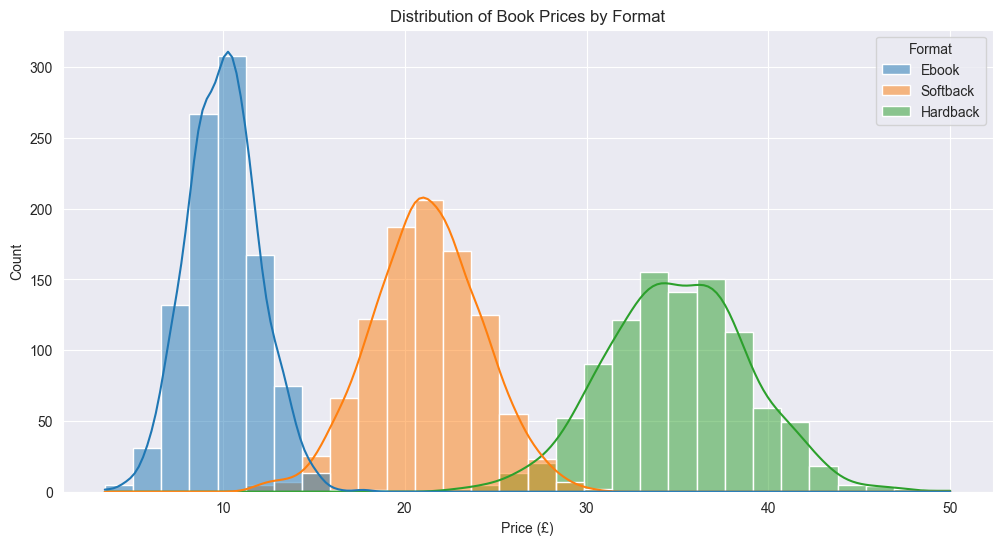

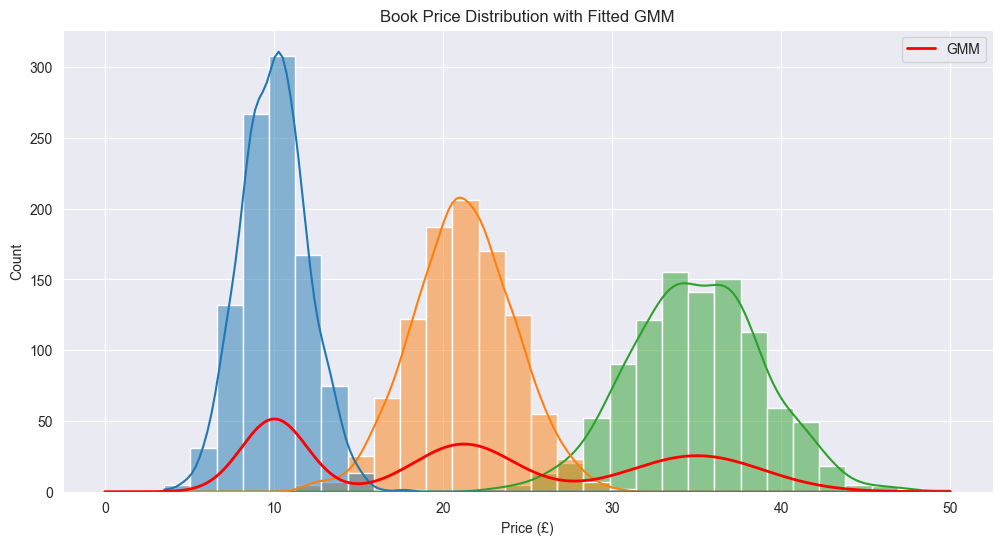

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns

## Data Generation
# Set random seed for reproducibility
np.random.seed(42)

# Ebooks: typically cheaper, tighter distribution
ebooks = np.random.normal(9.99, 2, 1000)
ebooks = np.clip(ebooks, 0, 25)  # Ensure no negative prices

# Softbacks: medium price, wider distribution
softbacks = np.random.normal(20.99, 3, 1000)
softbacks = np.clip(softbacks, 5, 30)

# Hardbacks: most expensive, widest distribution
hardbacks = np.random.normal(34.99, 4, 1000)
hardbacks = np.clip(hardbacks, 10, 50)

# Combine all prices and format labels
prices = np.concatenate([ebooks, softbacks, hardbacks])
formats = np.concatenate([
    np.full(1000, 'Ebook'),
    np.full(1000, 'Softback'),
    np.full(1000, 'Hardback')
])

# Create a DataFrame for easy plotting
df = pd.DataFrame({'Price': prices, 'Format': formats})



# Plot the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', hue='Format', kde=True, bins=30)
plt.title('Distribution of Book Prices by Format')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.show()

# Fit GMM using SKLearn
X = prices.reshape(-1, 1)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Generate points from the GMM for plotting
x = np.linspace(0, 50, 1000).reshape(-1, 1)
y = np.exp(gmm.score_samples(x))

# Plot the results
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Price', hue='Format', kde=True, bins=30, alpha=0.5)
plt.plot(x, y * 750, 'r-', linewidth=2, label='GMM')
plt.title('Book Price Distribution with Fitted GMM')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.legend()
plt.show()


Using this fitted model, can you assess how well our model fits our data? Use the predict function.

In [ ]:
from sklearn.metrics import accuracy_score

#Your code here

## Begin Solution
#Basically we just calculate the accuracy and achieve a good score as the classes tend to be quite well seperated in this example.

#Use predict function to assign cluster labels
cluster_labels = gmm.predict(X)

#Create a mapping from cluster labels to book formats
#This assumes that the clusters are ordered from lowest mean to highest
cluster_to_format = {
    np.argmin(gmm.means_): 'Ebook',
    np.argsort(gmm.means_.flatten())[1]: 'Softback',
    np.argmax(gmm.means_): 'Hardback'
}

#Convert cluster labels to predicted formats & calculate accuracy
predicted_formats = np.array([cluster_to_format[label] for label in cluster_labels])

accuracy = accuracy_score(formats, predicted_formats)
print(f"Accuracy: {accuracy:.2f}")
## End Solution

Now try some of the following exercises:

1. Generate a new dataset where the price distributions for different formats overlap more. How does this affect the GMM's ability to distinguish between formats?
2. Use the fitted GMM to classify a new set of book prices into the most likely format. How accurate is this classification compared to the actual formats?
3. Try fitting GMMs with different numbers of components (2, 3, 4, etc.). Use an information criterion like AIC or BIC to determine the optimal number. Does the optimal number always match the number of formats?

In [ ]:
#Your code here

## Begin Solution
from sklearn.metrics import confusion_matrix
from scipy.stats import norm

#Function to generate overlapping price distributions
def generate_overlapping_data(n_samples=1000, overlap_factor=0.5):
    ebooks = np.random.normal(15, 3 * overlap_factor, n_samples)
    softbacks = np.random.normal(25, 4 * overlap_factor, n_samples)
    hardbacks = np.random.normal(35, 5 * overlap_factor, n_samples)

    prices = np.concatenate([ebooks, softbacks, hardbacks])
    formats = np.concatenate([
        np.full(n_samples, 'Ebook'),
        np.full(n_samples, 'Softback'),
        np.full(n_samples, 'Hardback')
    ])

    return prices, formats

#Function to plot distribution and GMM fit
def plot_distribution_and_gmm(prices, formats, gmm, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(x=prices, hue=formats, kde=True, bins=30, alpha=0.5)

    x = np.linspace(0, 50, 1000).reshape(-1, 1)
    y = np.exp(gmm.score_samples(x))
    plt.plot(x, y * len(prices) / 20, 'r-', linewidth=2, label='GMM')

    plt.title(title)
    plt.xlabel('Price (£)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

#Function to evaluate GMM performance
def evaluate_gmm(gmm, X, true_formats):
    cluster_labels = gmm.predict(X)
    cluster_to_format = {
        np.argmin(gmm.means_): 'Ebook',
        np.argsort(gmm.means_.flatten())[1]: 'Softback',
        np.argmax(gmm.means_): 'Hardback'
    }
    predicted_formats = np.array([cluster_to_format[label] for label in cluster_labels])
    accuracy = accuracy_score(true_formats, predicted_formats)
    return accuracy, predicted_formats

#1. Generate and analyze overlapping data - students should expect lower accuracy versus before
overlap_prices, overlap_formats = generate_overlapping_data(overlap_factor=1.5)
X_overlap = overlap_prices.reshape(-1, 1)

gmm_overlap = GaussianMixture(n_components=3, random_state=42)
gmm_overlap.fit(X_overlap)

plot_distribution_and_gmm(overlap_prices, overlap_formats, gmm_overlap, 'Overlapping Book Price Distribution with Fitted GMM')

accuracy_overlap, _ = evaluate_gmm(gmm_overlap, X_overlap, overlap_formats)
print(f"Accuracy with overlapping distributions: {accuracy_overlap:.2f}")

#2. Classify new data - should get good performance
new_prices = np.random.uniform(5, 45, 1000).reshape(-1, 1)
new_true_formats = np.where(new_prices < 20, 'Ebook',
                            np.where(new_prices < 30, 'Softback', 'Hardback')).flatten()

new_predicted_formats = gmm_overlap.predict(new_prices)
cluster_to_format = {
    np.argmin(gmm_overlap.means_): 'Ebook',
    np.argsort(gmm_overlap.means_.flatten())[1]: 'Softback',
    np.argmax(gmm_overlap.means_): 'Hardback'
}
new_predicted_formats = np.array([cluster_to_format[label] for label in new_predicted_formats])

new_accuracy = accuracy_score(new_true_formats, new_predicted_formats)
print(f"Accuracy on new data: {new_accuracy:.2f}")

#3. Try different numbers of components - the ideal number of components does not necessarily reflect the number of classes
n_components_range = range(1, 7)
bic = []
aic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_overlap)
    bic.append(gmm.bic(X_overlap))
    aic.append(gmm.aic(X_overlap))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('AIC and BIC vs. Number of GMM Components')
plt.legend()
plt.show()

optimal_n_components_bic = n_components_range[np.argmin(bic)]
optimal_n_components_aic = n_components_range[np.argmin(aic)]
print(f"Optimal number of components (BIC): {optimal_n_components_bic}")
print(f"Optimal number of components (AIC): {optimal_n_components_aic}")
## End Solution

# 4. Bayesian Statistics

## Inference with Gaussian Prior

This notebook demonstrates how to perform Bayesian inference for the mean of a Gaussian distribution, assuming a Gaussian prior. We will:
1. Define a Gaussian prior for the mean.
2. Use observed data to compute the posterior distribution.
3. Visualize the prior, likelihood, and posterior.

---

### **Problem Setup**

We have:
- Observed data \(X = \{x_1, x_2, $(\dots, x_n)$}\), assumed to be drawn from a Gaussian distribution:
  $$
  X \sim N(\mu, \sigma^2)
  $$
  - $\mu$: Unknown mean
  - $\sigma$: Known standard deviation

- A **prior distribution** for \(\mu\), which is also Gaussian:
  $$
  \mu \sim N(\mu_0, \sigma_0^2)
  $$
  - $\mu_0$: Prior mean
  - $\sigma_0$: Prior standard deviation

Our goal is to compute the **posterior distribution** of \(\mu\) given the observed data \(X\).

---

## **Bayes' Theorem**

Bayes' theorem states:
$$
\text{Posterior} \propto \text{Prior} \times \text{Likelihood}
$$

For our problem:
$$
P(\mu | X) \propto P(\mu) \times P(X | \mu)
$$

---

## **Posterior Formulas**

The posterior distribution is also Gaussian, with the following parameters:

1. **Posterior Mean**:
$$
\mu_p = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{n \cdot \bar{x}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$
   - \(\bar{x}\) is the sample mean of the data: \(\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i\).

2. **Posterior Variance**:
$$
\sigma_p^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$

---

<details>
  <summary>Derivation of the posterior mean and variance</summary>

  ---

## **Step 1: Prior Distribution**

The prior distribution for $\mu$ is Gaussian:
$$
P(\mu) = N(\mu_0, \sigma_0^2)
$$

---

## **Step 2: Likelihood Function**

The likelihood of the data $X$ given $\mu$ is:
$$
P(X | \mu) = \prod_{i=1}^n N(x_i | \mu, \sigma^2)
$$

Since the data points are independent and identically distributed (i.i.d.), the likelihood simplifies to:
$$
P(X | \mu) \propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2\right)
$$

---

## **Step 3: Posterior Distribution**

The posterior distribution is proportional to the product of the prior and the likelihood:
$$
P(\mu | X) \propto \exp\left(-\frac{1}{2\sigma_0^2} (\mu - \mu_0)^2\right) \times \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2\right)
$$

Combining the exponents:
$$
P(\mu | X) \propto \exp\left(-\frac{1}{2} \left[\frac{(\mu - \mu_0)^2}{\sigma_0^2} + \frac{\sum_{i=1}^n (x_i - \mu)^2}{\sigma^2}\right]\right)
$$

---

## **Step 4: Simplify the Exponent**

The exponent can be rewritten as a quadratic in $\mu$:
$$
\text{Exponent} = -\frac{1}{2} \left[\frac{\mu^2 - 2\mu\mu_0 + \mu_0^2}{\sigma_0^2} + \frac{\sum_{i=1}^n (x_i^2 - 2\mu x_i + \mu^2)}{\sigma^2}\right]
$$

Collecting terms involving $\mu$:
$$
\text{Exponent} = -\frac{1}{2} \left[\mu^2 \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right) - 2\mu \left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right) + \text{constant terms}\right]
$$

This is of the form:
$$
\text{Exponent} = -\frac{1}{2} \left[A\mu^2 - 2B\mu + C\right]
$$

Where:
- $A = \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}$
- $B = \frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}$

---

## **Step 5: Complete the Square**

To express the exponent in the form of a Gaussian distribution:
$$
\text{Exponent} = -\frac{1}{2} \left[A(\mu - \mu_p)^2 + \text{constant terms}\right]
$$

Where:
- $\mu_p = \frac{B}{A}$ is the posterior mean.
- $\sigma_p^2 = \frac{1}{A}$ is the posterior variance.

Substituting $A$ and $B$:
$$
\mu_p = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$
$$
\sigma_p^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$

---

## **Final Formulas**

1. **Posterior Mean**:
$$
\mu_p = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{n \cdot \bar{x}}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$
   - $\bar{x}$ is the sample mean of the data: $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$.

2. **Posterior Variance**:
$$
\sigma_p^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$

---

</details>

## **Code Implementation**

The code below implements the above formulas and visualizes the prior, likelihood, and posterior distributions.

Posterior mean (mu_p): 3.17
Posterior standard deviation (sigma_p): 0.17


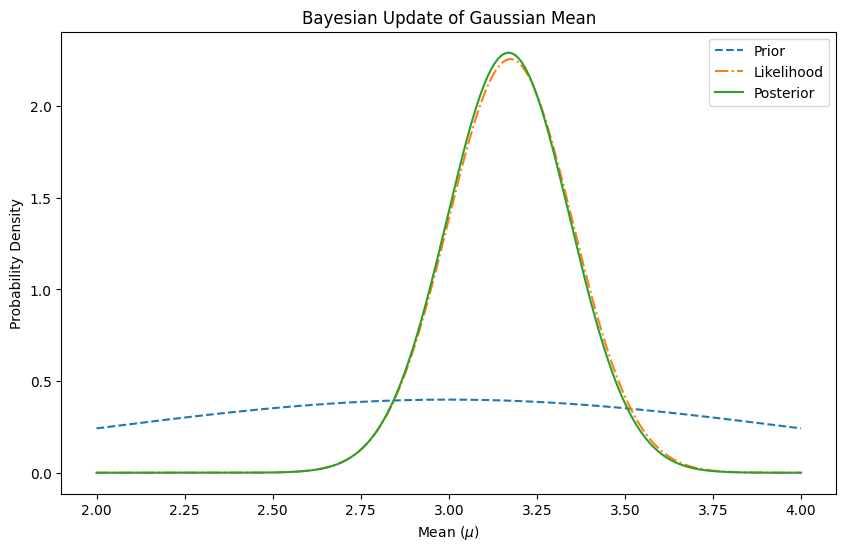

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Observed data (assumed to be generated from a Gaussian distribution)
data = np.array([3.2, 2.8, 3.6, 3.0, 3.1, 2.9, 3.3, 3.5])

# Known standard deviation of the data
sigma = 0.5

# Prior distribution for mu (mean) - assume Gaussian with mean mu_0 and std dev sigma_0
mu_0 = 3.0  # Prior mean
sigma_0 = 1.0  # Prior standard deviation

# Function to compute the posterior distribution of mu
def bayesian_update(data, sigma, mu_0, sigma_0):
    n = len(data)
    # Posterior mean (mu_p) and standard deviation (sigma_p)
    mu_p = (mu_0 / sigma_0**2 + np.sum(data) / sigma**2) / (1 / sigma_0**2 + n / sigma**2)
    sigma_p = np.sqrt(1 / (1 / sigma_0**2 + n / sigma**2))
    return mu_p, sigma_p

# Compute posterior parameters
mu_p, sigma_p = bayesian_update(data, sigma, mu_0, sigma_0)

# Print results
print(f"Posterior mean (mu_p): {mu_p:.2f}")
print(f"Posterior standard deviation (sigma_p): {sigma_p:.2f}")

# Plot prior, likelihood, and posterior
x = np.linspace(2, 4, 1000)  # Range of mu values to plot
prior = norm.pdf(x, mu_0, sigma_0)  # Prior distribution
likelihood = norm.pdf(x, np.mean(data), sigma / np.sqrt(len(data)))  # Likelihood
posterior = norm.pdf(x, mu_p, sigma_p)  # Posterior distribution

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior", linestyle="--")
plt.plot(x, likelihood, label="Likelihood", linestyle="-.")
plt.plot(x, posterior, label="Posterior", linestyle="-")
plt.title("Bayesian Update of Gaussian Mean")
plt.xlabel("Mean ($\mu$)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### Exercise:

1. Now play around with the prior mean and the variance to see how the posterior changes accordingly!


## 2-Class Classification with Uniform Prior

This part of the notebook demonstrates how to perform Bayesian inference for a 2-class classification problem with **2-dimensional data points** using a **uniform prior**. We will:
1. Define uniform priors for the means of both classes.
2. Use observed 2D data points to compute the posterior distributions for the class means.
3. Classify a test point based on the posterior distributions.

---

### **Problem Setup**

We have:
- A 2-class classification problem with two classes: **Class 0** and **Class 1**.
- Observed 2D data points $X = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$, where each point belongs to either Class 0 or Class 1.
- We assume the data for each class is generated from a **2D Gaussian distribution**:
  - Class 0: $N(\mu_0, \Sigma)$
  - Class 1: $N(\mu_1, \Sigma)$
  - $\mu_0$ and $\mu_1$ are the unknown means for Class 0 and Class 1, respectively.
  - $\Sigma$ is the known covariance matrix (assumed to be the same for both classes).

- We use **uniform priors** for the means, meaning we have no initial preference for the values of $\mu_0$ and $\mu_1$.

Our goal is to:
1. Compute the posterior distributions for $\mu_0$ and $\mu_1$.
2. Classify a test point based on the posterior distributions.

---

## **Bayesian Inference**

### **Prior Distribution**
We assume uniform priors for the means of both classes:
$$
P(\mu_0) = \text{Uniform}
$$
$$
P(\mu_1) = \text{Uniform}
$$

### **Likelihood Function**
The likelihood of the data given the means is:
$$
P(X | \mu_0, \mu_1) = \prod_{i \in \text{Class 0}} N(x_i | \mu_0, \Sigma) \times \prod_{i \in \text{Class 1}} N(x_i | \mu_1, \Sigma)
$$

### **Posterior Distribution**
Using Bayes' theorem, the posterior distributions for $\mu_0$ and $\mu_1$ are:
$$
P(\mu_0 | X) \propto \prod_{i \in \text{Class 0}} N(x_i | \mu_0, \Sigma)
$$
$$
P(\mu_1 | X) \propto \prod_{i \in \text{Class 1}} N(x_i | \mu_1, \Sigma)
$$

Since the prior is uniform, the posterior is proportional to the likelihood.

---

## **Posterior Formulas**

For each class, the posterior distribution is a Gaussian distribution:
$$
\mu_0 | X \sim N\left(\bar{x}_0, \frac{\Sigma}{n_0}\right)
$$
$$
\mu_1 | X \sim N\left(\bar{x}_1, \frac{\Sigma}{n_1}\right)
$$

Where:
- $\bar{x}_0$ and $\bar{x}_1$ are the sample means of Class 0 and Class 1, respectively.
- $n_0$ and $n_1$ are the number of data points in Class 0 and Class 1, respectively.
- $\Sigma$ is the known covariance matrix.

---

## **Classification of a Test Point**

To classify a test point $x_{\text{test}}$, we compute the posterior probabilities for each class:
$$
P(\text{Class 0} | x_{\text{test}}) \propto P(x_{\text{test}} | \mu_0) \cdot P(\mu_0 | X)
$$
$$
P(\text{Class 1} | x_{\text{test}}) \propto P(x_{\text{test}} | \mu_1) \cdot P(\mu_1 | X)
$$

The test point is assigned to the class with the higher posterior probability.

---

## **Code Implementation**

Now try some of the following exercises:

1. Calculate the posterior probability for the `x_test`
2. Try changing the test point `x_test` to see if its working properly.

Posterior mean for Class 0: [0.86432437 0.9279826 ]
Posterior mean for Class 1: [3.90454712 4.14006205]
Test point [2.5 2.5] is classified as: Class 1


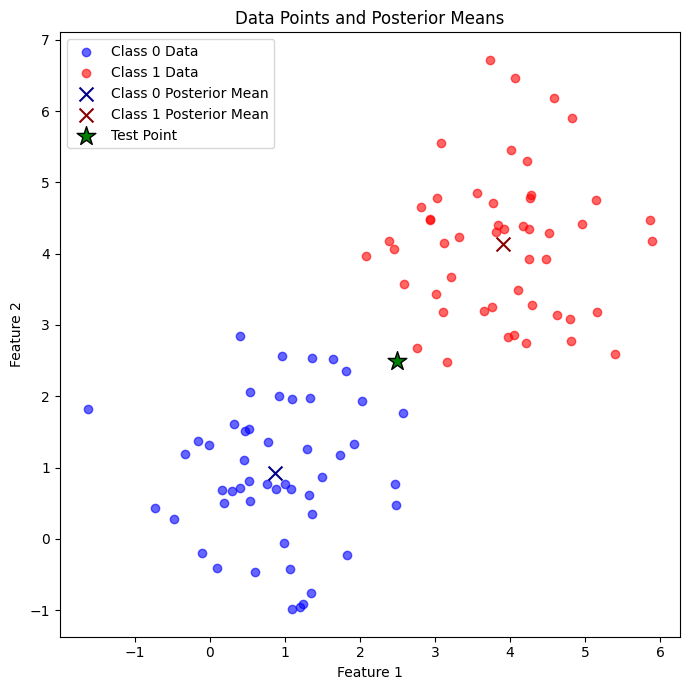

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic 2D data for two classes
np.random.seed(42)
n_class_0 = 50  # Number of Class 0 points
n_class_1 = 50  # Number of Class 1 points

# True means and covariance matrix for the data
mu_0_true = np.array([1, 1])  # True mean for Class 0
mu_1_true = np.array([4, 4])  # True mean for Class 1
cov = np.array([[1, 0], [0, 1]])  # Covariance matrix (same for both classes)

# Generate data for Class 0 and Class 1
X_class_0 = np.random.multivariate_normal(mu_0_true, cov, n_class_0)
X_class_1 = np.random.multivariate_normal(mu_1_true, cov, n_class_1)

# Combine data and labels
X = np.vstack((X_class_0, X_class_1))
y = np.hstack((np.zeros(n_class_0), np.ones(n_class_1)))

# Compute sample means for Class 0 and Class 1
mu_0_posterior = np.mean(X_class_0, axis=0)  # Posterior mean for Class 0
mu_1_posterior = np.mean(X_class_1, axis=0)  # Posterior mean for Class 1

# Posterior covariance matrices
cov_0_posterior = cov / n_class_0  # Posterior covariance for Class 0
cov_1_posterior = cov / n_class_1  # Posterior covariance for Class 1

# Print results
print("Posterior mean for Class 0:", mu_0_posterior)
print("Posterior mean for Class 1:", mu_1_posterior)

# Define a test point
x_test = np.array([2.5, 2.5])  # Test point to classify

# Compute posterior probabilities for the test point
## Enter you code here
# prob_class_0 =
# prob_class_1 =

# Classify the test point
if prob_class_0 > prob_class_1:
    classification = "Class 0"
else:
    classification = "Class 1"

print(f"Test point {x_test} is classified as: {classification}")

# Plot 1: Data points, posterior means, and test point
plt.figure(figsize=(7, 7))
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label="Class 0 Data", color="blue", alpha=0.6)
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label="Class 1 Data", color="red", alpha=0.6)
plt.scatter(mu_0_posterior[0], mu_0_posterior[1], label="Class 0 Posterior Mean", color="darkblue", marker="x", s=100)
plt.scatter(mu_1_posterior[0], mu_1_posterior[1], label="Class 1 Posterior Mean", color="darkred", marker="x", s=100)
plt.scatter(x_test[0], x_test[1], label="Test Point", color="green", marker="*", s=200, edgecolor="black")
plt.title("2-Class Classification with Uniform Prior")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

### Exercise:

1. Write a code for 2 class classification the same as above but with univariate gaussian distribution(1D data points)

Posterior probability for Class 1: 0.0424
Posterior probability for Class 2: 0.9576
The new point 4.5 is classified as Class 2.


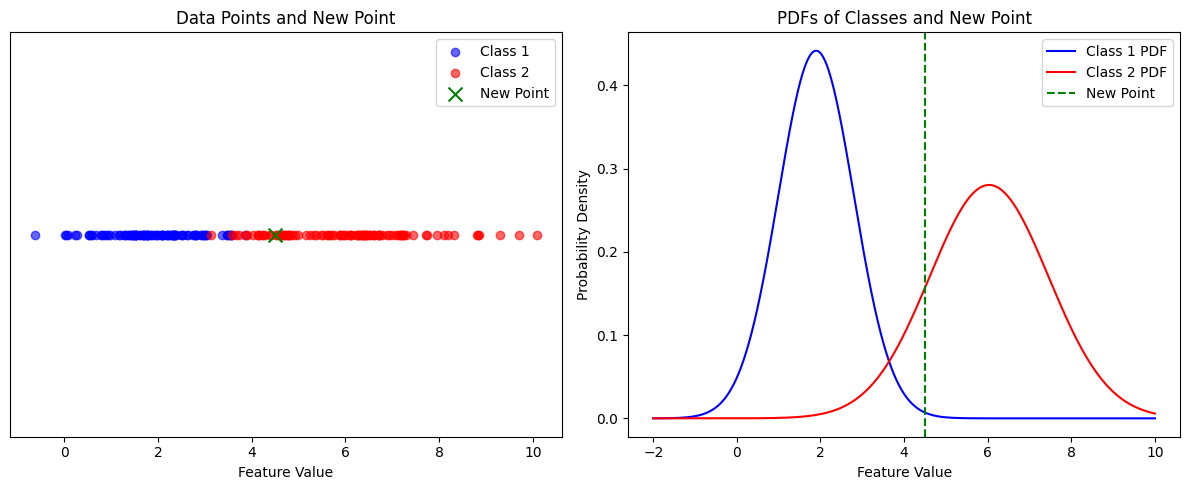

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Enter your code here

## 2-Class Classification with Gaussian Prior

This part of the notebook demonstrates how to perform Bayesian inference for a 2-class classification problem with **2-dimensional data points** using a **Gaussian prior**. We will:
1. Define Gaussian priors for the means of both classes.
2. Use observed 2D data points to compute the posterior distributions for the class means.
3. Classify a test point based on the posterior distributions.

---

### **Problem Setup**

We have:
- A 2-class classification problem with two classes: **Class 0** and **Class 1**.
- Observed 2D data points $X = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$, where each point belongs to either Class 0 or Class 1.
- We assume the data for each class is generated from a **2D Gaussian distribution**:
  - Class 0: $N(\mu_0, \Sigma)$
  - Class 1: $N(\mu_1, \Sigma)$
  - $\mu_0$ and $\mu_1$ are the unknown means for Class 0 and Class 1, respectively.
  - $\Sigma$ is the known covariance matrix (assumed to be the same for both classes).

- We use **Gaussian priors** for the means:
  - $\mu_0 \sim N(\mu_{0,\text{prior}}, \Sigma_{0,\text{prior}})$
  - $\mu_1 \sim N(\mu_{1,\text{prior}}, \Sigma_{1,\text{prior}})$

Our goal is to:
1. Compute the posterior distributions for $\mu_0$ and $\mu_1$.
2. Classify a test point based on the posterior distributions.

---

## **Bayesian Inference**

### **Prior Distribution**
We assume Gaussian priors for the means of both classes:
$$
\mu_0 \sim N(\mu_{0,\text{prior}}, \Sigma_{0,\text{prior}})
$$
$$
\mu_1 \sim N(\mu_{1,\text{prior}}, \Sigma_{1,\text{prior}})
$$

### **Likelihood Function**
The likelihood of the data given the means is:
$$
P(X | \mu_0, \mu_1) = \prod_{i \in \text{Class 0}} N(x_i | \mu_0, \Sigma) \times \prod_{i \in \text{Class 1}} N(x_i | \mu_1, \Sigma)
$$

### **Posterior Distribution**
Using Bayes' theorem, the posterior distributions for $\mu_0$ and $\mu_1$ are:
$$
P(\mu_0 | X) \propto P(\mu_0) \times \prod_{i \in \text{Class 0}} N(x_i | \mu_0, \Sigma)
$$
$$
P(\mu_1 | X) \propto P(\mu_1) \times \prod_{i \in \text{Class 1}} N(x_i | \mu_1, \Sigma)
$$

The posterior distributions are also Gaussian, with updated means and covariance matrices.

---

## **Posterior Formulas**

For each class, the posterior mean and covariance matrix are given by:
$$
\mu_{\text{posterior}} = \left(\Sigma_{\text{prior}}^{-1} + n \Sigma^{-1}\right)^{-1} \left(\Sigma_{\text{prior}}^{-1} \mu_{\text{prior}} + \Sigma^{-1} \sum_{i=1}^n x_i\right)
$$
$$
\Sigma_{\text{posterior}} = \left(\Sigma_{\text{prior}}^{-1} + n \Sigma^{-1}\right)^{-1}
$$

Where:
- $n$ is the number of data points in the class.
- $\mu_{\text{prior}}$ and $\Sigma_{\text{prior}}$ are the prior mean and covariance matrix.
- $\Sigma$ is the known covariance matrix of the data.

---

## **Classification of a Test Point**

To classify a test point $x_{\text{test}}$, we compute the posterior probabilities for each class:
$$
P(\text{Class 0} | x_{\text{test}}) \propto P(x_{\text{test}} | \mu_0) \cdot P(\mu_0 | X)
$$
$$
P(\text{Class 1} | x_{\text{test}}) \propto P(x_{\text{test}} | \mu_1) \cdot P(\mu_1 | X)
$$

The test point is assigned to the class with the higher posterior probability.

---

## **Code Implementation**

Now try some of the following exercises:

1. Implement the function `bayesian_update` using the above formula.
2. Try changing the test point `x_test` to see if its working properly.

Posterior mean for Class 0: [0.8557667  0.91879465]
Posterior covariance for Class 0:
 [[0.01980198 0.        ]
 [0.         0.01980198]]
Posterior mean for Class 1: [3.91539319 4.14857629]
Posterior covariance for Class 1:
 [[0.01980198 0.        ]
 [0.         0.01980198]]
Test point [2.5 2.5] is classified as: Class 1


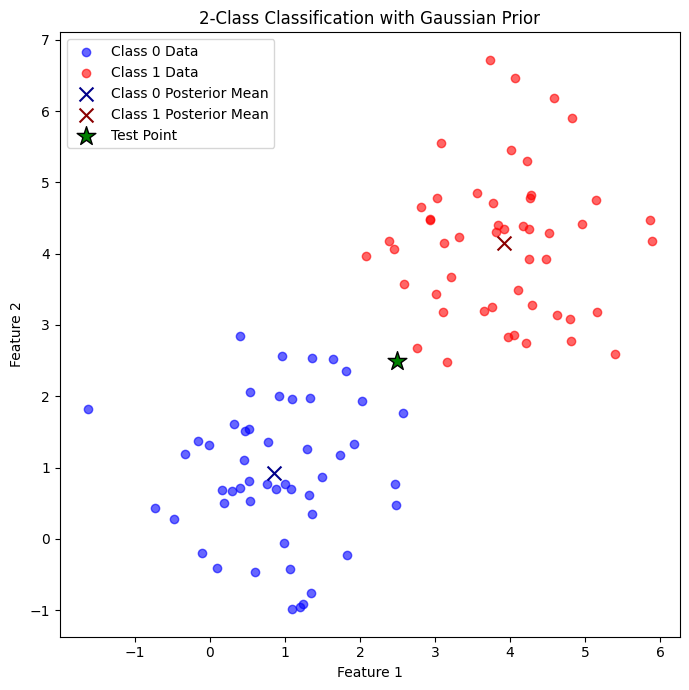

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic 2D data for two classes
np.random.seed(42)
n_class_0 = 50  # Number of Class 0 points
n_class_1 = 50  # Number of Class 1 points

# True means and covariance matrix for the data
mu_0_true = np.array([1, 1])  # True mean for Class 0
mu_1_true = np.array([4, 4])  # True mean for Class 1
cov = np.array([[1, 0], [0, 1]])  # Covariance matrix (same for both classes)

# Generate data for Class 0 and Class 1
X_class_0 = np.random.multivariate_normal(mu_0_true, cov, n_class_0)
X_class_1 = np.random.multivariate_normal(mu_1_true, cov, n_class_1)

# Combine data and labels
X = np.vstack((X_class_0, X_class_1))
y = np.hstack((np.zeros(n_class_0), np.ones(n_class_1)))

# Prior parameters (Gaussian prior for the means)
mu_0_prior = np.array([0, 0])  # Prior mean for Class 0
mu_1_prior = np.array([5, 5])  # Prior mean for Class 1
cov_prior = np.array([[2, 0], [0, 2]])  # Prior covariance matrix (same for both classes)

# Function to compute posterior parameters
def bayesian_update(X_class, mu_prior, cov_prior, cov):

    ## Enter your code here

    return mu_posterior, cov_posterior

# Compute posterior parameters for Class 0 and Class 1
mu_0_posterior, cov_0_posterior = bayesian_update(X_class_0, mu_0_prior, cov_prior, cov)
mu_1_posterior, cov_1_posterior = bayesian_update(X_class_1, mu_1_prior, cov_prior, cov)

# Print results
print("Posterior mean for Class 0:", mu_0_posterior)
print("Posterior covariance for Class 0:\n", cov_0_posterior)
print("Posterior mean for Class 1:", mu_1_posterior)
print("Posterior covariance for Class 1:\n", cov_1_posterior)

# Define a test point
x_test = np.array([2.5, 2.5])  # Test point to classify

# Compute posterior probabilities for the test point
prob_class_0 = multivariate_normal.pdf(x_test, mu_0_posterior, cov_0_posterior + cov)
prob_class_1 = multivariate_normal.pdf(x_test, mu_1_posterior, cov_1_posterior + cov)

# Classify the test point
if prob_class_0 > prob_class_1:
    classification = "Class 0"
else:
    classification = "Class 1"

print(f"Test point {x_test} is classified as: {classification}")

# Plot 1: Data points, posterior means, and test point
plt.figure(figsize=(7, 7))
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label="Class 0 Data", color="blue", alpha=0.6)
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label="Class 1 Data", color="red", alpha=0.6)
plt.scatter(mu_0_posterior[0], mu_0_posterior[1], label="Class 0 Posterior Mean", color="darkblue", marker="x", s=100)
plt.scatter(mu_1_posterior[0], mu_1_posterior[1], label="Class 1 Posterior Mean", color="darkred", marker="x", s=100)
plt.scatter(x_test[0], x_test[1], label="Test Point", color="green", marker="*", s=200, edgecolor="black")
plt.title("2-Class Classification with Gaussian Prior")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

# Further Exercises

## EM Algorithm For GMM's

The Expectation-Maximization (EM) algorithm is a powerful method for finding maximum likelihood estimates of parameters in statistical models with latent variables. In the context of Gaussian Mixture Models (GMMs), EM is used to estimate the parameters when we don't know which component generated each data point.

The EM algorithm consists of two main steps which are repeated iteratively until convergence:

1. Expectation (E) step: Estimate the probability of each data point belonging to each Gaussian component, given the current parameter estimates.
2. Maximization (M) step: Update the parameters (means, covariances, and weights) to maximize the likelihood, given the probabilities calculated in the E step.

This comes with some advantages and drawbacks.

Advantages:

- Guaranteed to increase the likelihood at each iteration
- Can handle missing data and hidden variables

Limitations:

- Can converge to local optima, sensitive to initialization
- Number of components needs to be specified in advance
- Can be slow for large datasets or high-dimensional data

For GMM's in particular, the algorithm works as follows:

1. Initialize the parameters: means $(μ_k)$, covariances $(Σ_k)$, and weights $(π_k)$ for $K$ components.
2. E-step: For each data point $x_i$ and component $k$, compute the responsibility:
   $γ_{i_k} = π_kN(x_i|μ_k,Σ_k)\; /\; Σ_j π_j N(x_i|μ_j,Σ_j)$
3. M-step: Update the parameters:

   $μ_k = Σ_i γ_{i_k}x_i \;/\; Σ_i γ_{i_k}$

   $Σₖ = Σ_i γ_{i_K}(x_i-μ_k)(x_i-μ_k)ᵀ \;/\; Σ_i γ_{i_k}$

   $π_k = Σ_i γ_{i_k} \;/\; N$

Repeat steps 2-3 until convergence.

Using online resources such as [this notebook](https://stephens999.github.io/fiveMinuteStats/intro_to_em.html), can you implement an EM algorithm to infer the GMM parameters for a GMM with the following 3 components?

In [ ]:
# Generate synthetic data
np.random.seed(42)
n_samples = 1000

# Generate three clusters
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n_samples // 3)
X2 = np.random.multivariate_normal([5, 5], [[1.5, 0.5], [0.5, 1.5]], n_samples // 3)
X3 = np.random.multivariate_normal([-3, 5], [[1.2, -0.7], [-0.7, 1.2]], n_samples // 3)
X = np.vstack((X1, X2, X3))

#Your code here

## Non-Gaussian Distributions

As an extension, you should reconsider this workshop in light of using non-Gaussian distributions.

1. Try to implement MLE for a multivariate exponential distribution- what changes do you need to make?

In [ ]:
#Code for  MLE of a exp distribution

2. Does a mixture model for non-Gaussian distributions make sense? Can you try making an Exponential Mixture Model?

In [ ]:
#Code for a EMM

3. What if you use a counts based probability distribution for a MM, like the Poisson or Negative Binomial distribution? Does it make sense to do this?

In [ ]:
#Code for a PMM

4. Finally, what if you wanted to implement the EM algorithm for a non-Gaussian distribution? Try it below:

In [ ]:
#Code for EM on Non-Gaussian MM's